In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Memory Used (mb)')

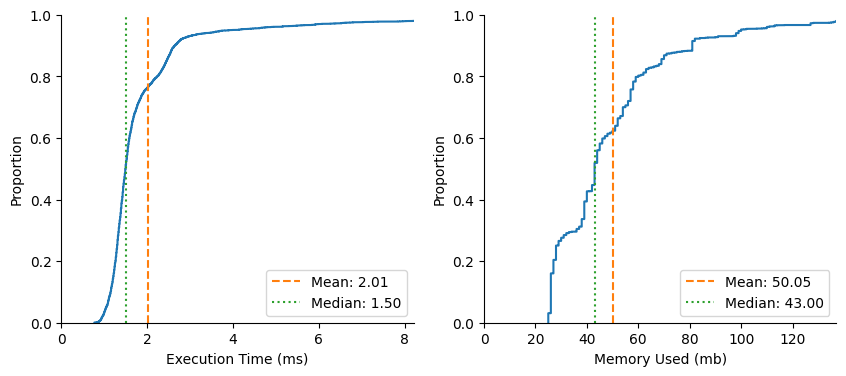

In [4]:
data = pd.read_csv("aws_metrics.csv")
_, axs = plt.subplots(1, 2, figsize=(10,4))

for i, col in enumerate(["duration (ms)", "max_memory_used (MB)"]):
    stats = [data[col].mean(), data[col].median()]
     
    sns.ecdfplot(data[[col]], ax=axs[i], legend=False)
    
    axs[i].plot([stats[0]]*2, [0,1], linestyle='--', label=f'Mean: {stats[0]:.2f}')
    axs[i].plot([stats[1]]*2, [0,1],linestyle=':', label=f'Median: {stats[1]:.2f}')
    axs[i].legend()

    x_max = data[col].quantile(q=0.98)
    axs[i].set_xlim(0, x_max)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    
axs[0].set_xlabel("Execution Time (ms)")
axs[1].set_xlabel("Memory Used (mb)")